## Oscillations, Waves, and Optics, Question 7
A simple pendulum consists of a small bob of mass $m$ hanging from a massless string of length $l$ in a gravitational field $g$. Its equation of motion is
$$\ddot{\theta} = −(g/l) \sin \theta.$$
The pendulum is displaced by an angle $\theta_0$ and released from rest. Plot the displacement $\theta$ as a function of time for a few periods, for initial values $\theta_0 = 0.01,\ 0.03,\ 0.1,\ 1.0,\ 2.0,\ 3.0$ radians and comment on the results. (Assume for simplicity
that $g = 10\ {\rm ms^{−2}}$ and $l = 10\ {\rm m}$. You may find it helpful to plot the normalised displacements, $\theta/\theta_0$, against time.).

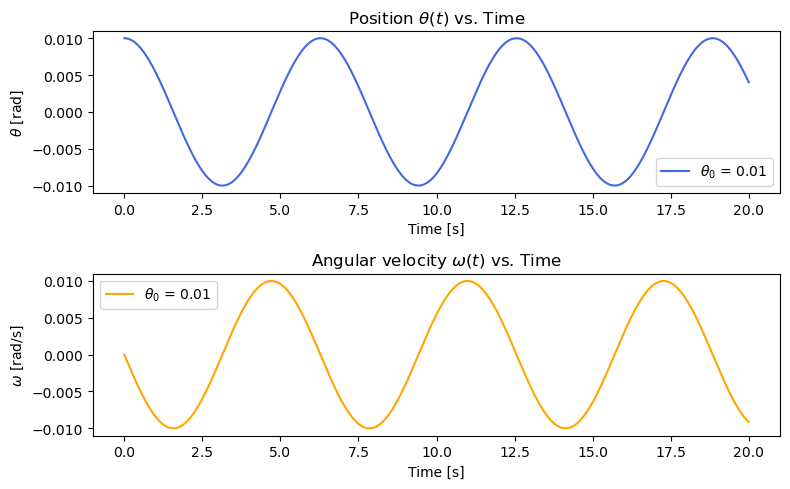

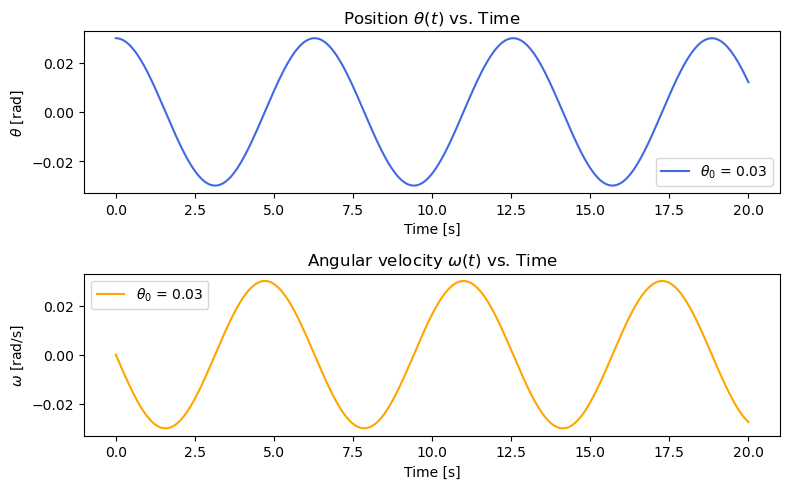

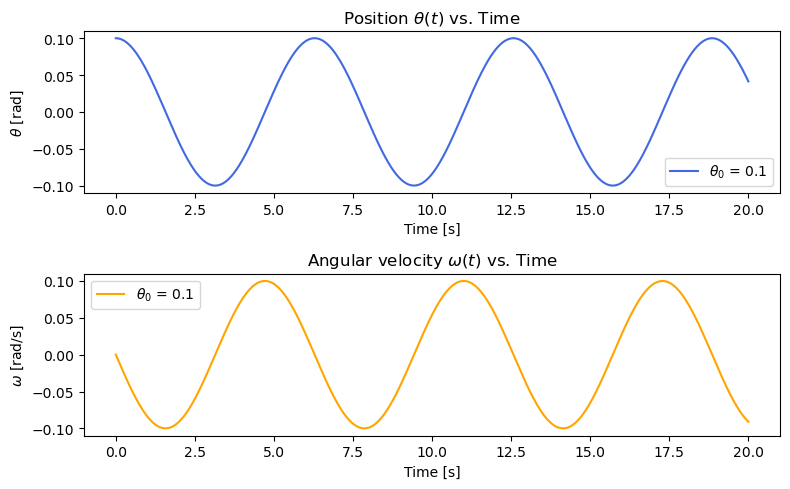

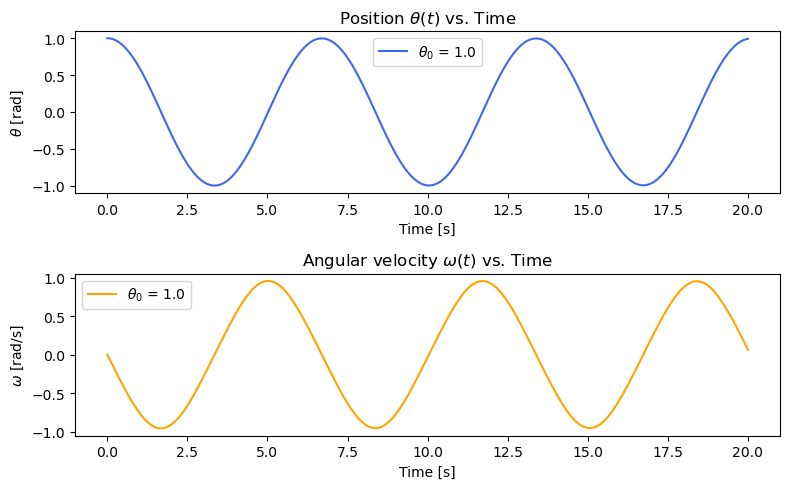

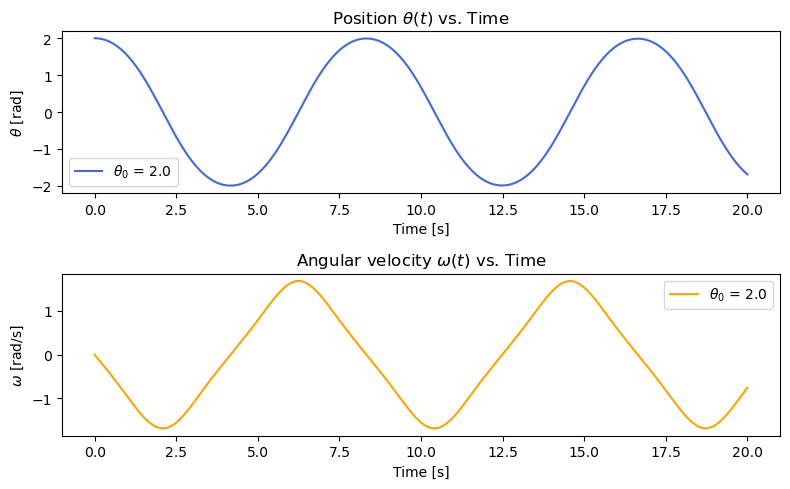

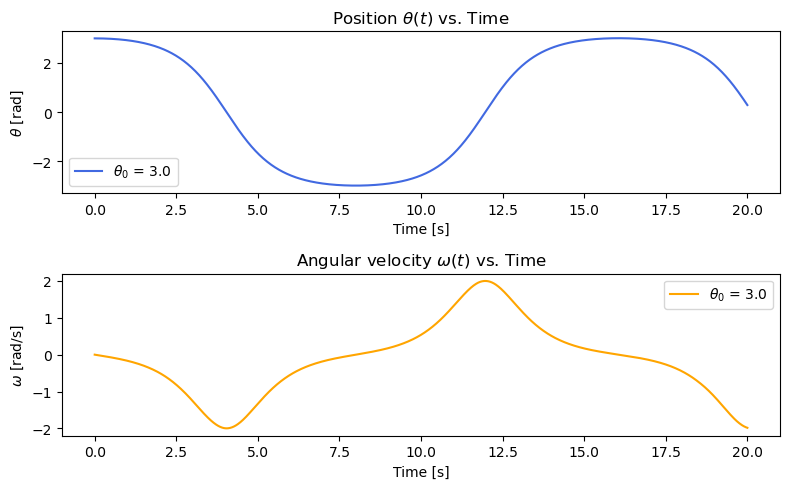

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations
def equations(t, y, A):
    theta, omega = y # omega is the angular velocity dtheta/dt
    dxdt = omega
    dvdt = -A * np.sin(theta)
    return [dxdt, dvdt]

# Initial conditions
theta_0 = [0.01, 0.03, 0.1, 1., 2., 3.]  # initial position
omega_0 = 0    # initial angular velocity
g = 10     
l = 10
A = g / l  # A = g / l
t_span = (0, 20)  # time range for the solution


for initials in theta_0:
    initial_conditions = [initials, omega_0]
    # Solve the system using solve_ivp
    solution = solve_ivp(equations, t_span, initial_conditions, args=(A,), dense_output=True, t_eval=np.linspace(t_span[0], t_span[1], 1000))

    # Extract the results
    t_values = solution.t
    theta_values = solution.y[0]
    omega_values = solution.y[1]

    # Plot the results
    plt.figure(figsize=(8, 5))

    plt.subplot(2, 1, 1)
    plt.plot(t_values, theta_values, color='royalblue', label=r'$\theta_0$ = '+str(initials))
    plt.title(r'Position $\theta(t)$ vs. Time')
    plt.xlabel(r'Time [s]')
    plt.ylabel(r'$\theta$ [rad]')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t_values, omega_values, color='orange', label=r'$\theta_0$ = '+str(initials))
    plt.title(r'Angular velocity $\omega(t)$ vs. Time')
    plt.xlabel(r'Time [s]')
    plt.ylabel(r'$\omega$ [rad/s]')
    plt.legend()

    plt.tight_layout()
    plt.show()
